<a href="https://colab.research.google.com/github/muhammedafsalpm/ICT-Academy-of-Kerala/blob/main/ICT_DSA_Exit_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DSA - Exit Test**

# **House Price Prediction using Machine Learning**

# **Exploratory Data Analysis (EDA)**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pip install openpyxl

**Understand the Dataset**

In [6]:
df = pd.read_excel('/content/dataset.xlsx')

In [7]:
df.head()

,Unnamed: 0,Price,Location,Bedroom,Bathroom,Carport,Land,Building,Month,City/Regency,Latitude,Longitude
0,0,1.600000e+09,Padalarang,2,1.0,1.0,72.0,50.0,8.0,West Bandung Regency,-6.843600,107.478400
1,1,8.500000e+08,Parongpong,2,1.0,1.0,70.0,80.0,8.0,West Bandung Regency,-6.803228,107.581804
2,2,8.750000e+08,Buah Batu,3,2.0,1.0,60.0,70.0,8.0,Bandung City,-6.965549,107.637926
3,3,1.750000e+09,Bojongsoang,2,3.0,1.0,90.0,94.0,8.0,Bandung Regency,-6.993945,107.643700
4,4,4.900000e+09,Bojongloa Kidul,4,4.0,0.0,200.0,300.0,8.0,Bandung City,-6.947036,107.596271


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32536 entries, 0 to 32535
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    32536 non-null  int64  
 1   Price         32536 non-null  float64
 2   Location      32527 non-null  object 
 3   Bedroom       32536 non-null  int64  
 4   Bathroom      32521 non-null  float64
 5   Carport       32521 non-null  float64
 6   Land          32533 non-null  float64
 7   Building      32527 non-null  float64
 8   Month         32527 non-null  float64
 9   City/Regency  32527 non-null  object 
 10  Latitude      32526 non-null  float64
 11  Longitude     32527 non-null  float64
dtypes: float64(8), int64(2), object(2)
memory usage: 3.0+ MB


In [9]:
df.shape

(32536, 12)

In [10]:
df.describe()

,Unnamed: 0,Price,Bedroom,Bathroom,Carport,Land,Building,Month,Latitude,Longitude
count,32536.000000,3.253600e+04,32536.000000,32521.000000,32521.000000,32533.000000,32527.000000,32527.000000,32526.000000,32527.000000
mean,25966.194308,2.554932e+09,3.524158,2.527721,1.052120,181.392002,179.397485,8.988533,-6.923486,107.625922
std,15468.621566,1.879994e+09,1.235943,1.074318,0.796993,107.491313,108.516303,0.821016,0.051064,0.075701
min,0.000000,1.020000e+07,1.000000,1.000000,0.000000,37.000000,37.000000,8.000000,-7.230321,107.434849
25%,12565.750000,1.200000e+09,3.000000,2.000000,0.000000,105.000000,100.000000,8.000000,-6.952981,107.590747
50%,25392.000000,2.000000e+09,3.000000,2.000000,1.000000,147.000000,150.000000,9.000000,-6.931934,107.626219
75%,39255.250000,3.365000e+09,4.000000,3.000000,2.000000,225.000000,235.000000,10.000000,-6.886334,107.659881
max,53466.000000,9.700000e+09,8.000000,7.000000,3.000000,612.000000,585.000000,10.000000,-6.734761,107.886580


In [11]:
df.describe(include=['object'])

,Location,City/Regency
count,32527,32527
unique,66,3
top,Buah Batu,Bandung City
freq,2781,23999


In [12]:
df.isna().sum()

,0
Unnamed: 0,0
Price,0
Location,9
Bedroom,0
Bathroom,15
Carport,15
Land,3
Building,9
Month,9
City/Regency,9


In [13]:
df = df.drop(columns=['Unnamed: 0']) # Here Drop Column - Unnamed: 0

In [14]:
df.columns

Index(['Price', 'Location', 'Bedroom', 'Bathroom', 'Carport', 'Land',
       'Building', 'Month', 'City/Regency', 'Latitude', 'Longitude'],
      dtype='object')

**Handle Missing Data**

In [15]:
df.isna().sum()

,0
Price,0
Location,9
Bedroom,0
Bathroom,15
Carport,15
Land,3
Building,9
Month,9
City/Regency,9
Latitude,10


**Location**

In [16]:
df[df['Location'].isnull()]

,Price,Location,Bedroom,Bathroom,Carport,Land,Building,Month,City/Regency,Latitude,Longitude
56,9.200000e+08,NaN,5,3.0,1.0,105.0,160.0,8.0,Bandung Regency,-6.966935,107.578338
85,1.250000e+09,NaN,2,2.0,0.0,55.0,85.0,8.0,Bandung City,-6.947036,107.596271
110,2.600000e+09,NaN,4,3.0,2.0,143.0,197.0,8.0,Bandung City,-6.880933,107.613921
526,3.200000e+09,NaN,2,2.0,1.0,200.0,180.0,8.0,Bandung City,-6.947036,107.596271
527,6.000000e+09,NaN,4,5.0,2.0,285.0,350.0,8.0,Bandung City,-6.947036,107.596271
528,4.200000e+09,NaN,3,3.0,2.0,180.0,270.0,8.0,Bandung City,-6.947036,107.596271
529,4.750000e+09,NaN,6,3.0,3.0,315.0,500.0,8.0,Bandung City,-6.947036,107.596271
530,4.500000e+09,NaN,4,3.0,2.0,200.0,300.0,8.0,Bandung City,-6.947036,107.596271
531,3.850000e+09,NaN,4,4.0,2.0,139.0,208.0,8.0,Bandung City,-6.947036,107.596271


I am filling the missing values in the `Location` column using the `City/Regency`, `Latitude`, and `Longitude` columns.

In [17]:
df[(df['City/Regency'].str.strip() == 'Bandung Regency') &
                 (np.isclose(df['Latitude'], -6.966935, atol=1e-6)) &
                 (np.isclose(df['Longitude'], 107.578338, atol=1e-6))]['Location'].value_counts()

,count
Location,
Margahayu,1080


In [18]:
df.at[56, 'Location'] = 'Margahayu'

In [19]:
df[(df['City/Regency'].str.strip() == 'Bandung City') &
                 (np.isclose(df['Latitude'], -6.947036, atol=1e-6)) &
                 (np.isclose(df['Longitude'], 107.596271, atol=1e-6))]['Location'].value_counts()

,count
Location,
Bojongloa Kidul,1470


In [20]:
indices_to_fill = [85, 526, 527, 528, 529, 530, 531]

df.loc[indices_to_fill, 'Location'] = 'Bojongloa Kidul'


In [21]:
df[df['Location'].isnull()]

,Price,Location,Bedroom,Bathroom,Carport,Land,Building,Month,City/Regency,Latitude,Longitude
110,2.600000e+09,NaN,4,3.0,2.0,143.0,197.0,8.0,Bandung City,-6.880933,107.613921


In [22]:
df[(df['City/Regency'].str.strip() == 'Bandung City') &
                 (np.isclose(df['Latitude'], -6.880933, atol=1e-6)) &
                 (np.isclose(df['Longitude'], 107.613921, atol=1e-6))]['Location'].value_counts()

,count
Location,
Coblong,1233


In [23]:
df.at[110, 'Location'] = 'Coblong'

Similary, i'm filling na vales in columns - City/Regency,
Latitude,
Longitude


**City/Regency**

In [24]:
df[df['City/Regency'].isnull()]

,Price,Location,Bedroom,Bathroom,Carport,Land,Building,Month,City/Regency,Latitude,Longitude
214,1.800000e+09,Buah Batu,4,4.0,1.0,148.0,NaN,NaN,NaN,-6.965549,107.637926
215,1.380000e+09,Batununggal,3,3.0,0.0,131.0,NaN,NaN,NaN,-6.952981,107.630909
216,2.000000e+09,Buah Batu,3,2.0,1.0,80.0,NaN,NaN,NaN,-6.965549,107.637926
217,4.500000e+09,Cidadap,2,3.0,2.0,360.0,NaN,NaN,NaN,-6.862797,107.609356
218,1.350000e+09,Sukasari,3,2.0,0.0,126.0,NaN,NaN,NaN,-6.863000,107.588100
219,2.500000e+09,Buah Batu,4,4.0,1.0,213.0,NaN,NaN,NaN,-6.965549,107.637926
220,3.200000e+09,Sukasari,4,3.0,2.0,163.0,NaN,NaN,NaN,-6.863000,107.588100
221,5.700000e+09,Padalarang,4,3.0,2.0,233.0,NaN,NaN,NaN,-6.843600,107.478400
222,1.200000e+09,Bojongloa Kaler,2,1.0,1.0,103.0,NaN,NaN,NaN,-6.932326,107.590747


In [25]:
df[(df['Location'].str.strip() == 'Buah Batu') &
                 (np.isclose(df['Latitude'], -6.965549, atol=1e-6)) &
                 (np.isclose(df['Longitude'], 107.637926, atol=1e-6))]['City/Regency'].value_counts()

,count
City/Regency,
Bandung City,2776


In [26]:
indices_to_fill = [214, 216, 219]

df.loc[indices_to_fill, 'City/Regency'] = 'Bandung City'

In [27]:
df[(df['Location'].str.strip() == 'Batununggal') &
                 (np.isclose(df['Latitude'], -6.952981, atol=1e-6)) &
                 (np.isclose(df['Longitude'], 107.630909, atol=1e-6))]['City/Regency'].value_counts()

,count
City/Regency,
Bandung City,1599


In [28]:
df.at[215, 'City/Regency'] = 'Bandung City'

In [29]:
df[df['City/Regency'].isnull()]

,Price,Location,Bedroom,Bathroom,Carport,Land,Building,Month,City/Regency,Latitude,Longitude
217,4.500000e+09,Cidadap,2,3.0,2.0,360.0,NaN,NaN,NaN,-6.862797,107.609356
218,1.350000e+09,Sukasari,3,2.0,0.0,126.0,NaN,NaN,NaN,-6.863000,107.588100
220,3.200000e+09,Sukasari,4,3.0,2.0,163.0,NaN,NaN,NaN,-6.863000,107.588100
221,5.700000e+09,Padalarang,4,3.0,2.0,233.0,NaN,NaN,NaN,-6.843600,107.478400
222,1.200000e+09,Bojongloa Kaler,2,1.0,1.0,103.0,NaN,NaN,NaN,-6.932326,107.590747


In [30]:
df[(df['Location'].str.strip() == 'Cidadap') &
                 (np.isclose(df['Latitude'], -6.862797, atol=1e-6)) &
                 (np.isclose(df['Longitude'], 107.609356, atol=1e-6))]['City/Regency'].value_counts()

,count
City/Regency,
Bandung City,941


In [31]:
df.at[217, 'City/Regency'] = 'Bandung City'

In [32]:
df[(df['Location'].str.strip() == 'Sukasari') &
                 (np.isclose(df['Latitude'], -6.863000, atol=1e-6)) &
                 (np.isclose(df['Longitude'], 107.588100, atol=1e-6))]['City/Regency'].value_counts()

,count
City/Regency,
Bandung City,1999


In [33]:
indices_to_fill = [218, 220]

df.loc[indices_to_fill, 'City/Regency'] = 'Bandung City'

In [34]:
df[(df['Location'].str.strip() == 'Padalarang') &
                 (np.isclose(df['Latitude'], -6.843600, atol=1e-6)) &
                 (np.isclose(df['Longitude'], 107.478400, atol=1e-6))]['City/Regency'].value_counts()

,count
City/Regency,
West Bandung Regency,2552


In [35]:
df.at[221, 'City/Regency'] = 'West Bandung Regency'

In [36]:
df[(df['Location'].str.strip() == 'Bojongloa Kaler') &
                 (np.isclose(df['Latitude'], -6.932326, atol=1e-6)) &
                 (np.isclose(df['Longitude'], 107.590747, atol=1e-6))]['City/Regency'].value_counts()

,count
City/Regency,
Bandung City,751


In [37]:
df.at[222, 'City/Regency'] = 'Bandung City'

In [38]:
df['City/Regency'].isna().sum()

0

**Latitude**

In [39]:
df[df['Latitude'].isnull()]

,Price,Location,Bedroom,Bathroom,Carport,Land,Building,Month,City/Regency,Latitude,Longitude
359,5.600000e+09,Bojongloa Kidul,3,2.0,1.0,325.0,200.0,8.0,Bandung City,NaN,107.596271
360,1.250000e+09,Lengkong,3,2.0,1.0,126.0,145.0,8.0,Bandung City,NaN,107.626219
361,1.550000e+09,Padalarang,2,1.0,1.0,72.0,50.0,8.0,West Bandung Regency,NaN,107.478400
362,9.500000e+08,Margaasih,2,1.0,1.0,78.0,60.0,8.0,Bandung Regency,NaN,107.838072
363,7.800000e+09,Sukasari,4,4.0,2.0,367.0,550.0,8.0,Bandung City,NaN,107.588100
364,8.500000e+08,Arcamanik,3,2.0,1.0,120.0,108.0,8.0,Bandung City,NaN,107.677016
365,2.100000e+09,Antapani,3,3.0,1.0,124.0,160.0,8.0,Bandung City,NaN,107.659881
366,1.600000e+09,Arcamanik,6,3.0,1.0,186.0,160.0,8.0,Bandung City,NaN,107.677016
367,1.780000e+09,Lengkong,3,4.0,1.0,100.0,170.0,8.0,Bandung City,NaN,107.626219
368,7.100000e+08,Arcamanik,3,2.0,2.0,96.0,75.0,8.0,Bandung City,NaN,107.677016


In [40]:
df[(df['Location'].str.strip() == 'Bojongloa Kidul')]['Latitude'].value_counts()

,count
Latitude,
-6.947036,1477


In [41]:
df.loc[df['Location'].str.strip() == 'Bojongloa Kidul', 'Latitude'] = -6.947036

In [42]:
df[(df['Location'].str.strip() == 'Lengkong')]['Latitude'].value_counts()

,count
Latitude,
-6.934348,1603


In [43]:
df.loc[df['Location'].str.strip() == 'Bojongloa Kidul', 'Latitude'] = -6.934348

In [44]:
df[(df['Location'].str.strip() == 'Padalarang')]['Latitude'].value_counts()

,count
Latitude,
-6.8436,2559


In [45]:
df.loc[df['Location'].str.strip() == 'Bojongloa Kidul', 'Latitude'] = -6.8436

In [46]:
df[(df['Location'].str.strip() == 'Margaasih')]['Latitude'].value_counts()

,count
Latitude,
-7.016285,1816


In [47]:
df.loc[df['Location'].str.strip() == 'Bojongloa Kidul', 'Latitude'] = -7.016285

In [48]:
df[df['Latitude'].isnull()]

,Price,Location,Bedroom,Bathroom,Carport,Land,Building,Month,City/Regency,Latitude,Longitude
360,1.250000e+09,Lengkong,3,2.0,1.0,126.0,145.0,8.0,Bandung City,NaN,107.626219
361,1.550000e+09,Padalarang,2,1.0,1.0,72.0,50.0,8.0,West Bandung Regency,NaN,107.478400
362,9.500000e+08,Margaasih,2,1.0,1.0,78.0,60.0,8.0,Bandung Regency,NaN,107.838072
363,7.800000e+09,Sukasari,4,4.0,2.0,367.0,550.0,8.0,Bandung City,NaN,107.588100
364,8.500000e+08,Arcamanik,3,2.0,1.0,120.0,108.0,8.0,Bandung City,NaN,107.677016
365,2.100000e+09,Antapani,3,3.0,1.0,124.0,160.0,8.0,Bandung City,NaN,107.659881
366,1.600000e+09,Arcamanik,6,3.0,1.0,186.0,160.0,8.0,Bandung City,NaN,107.677016
367,1.780000e+09,Lengkong,3,4.0,1.0,100.0,170.0,8.0,Bandung City,NaN,107.626219
368,7.100000e+08,Arcamanik,3,2.0,2.0,96.0,75.0,8.0,Bandung City,NaN,107.677016


In [49]:
df[(df['Location'].str.strip() == 'Lengkong')]['Latitude'].value_counts()

,count
Latitude,
-6.934348,1603


In [50]:
df.loc[df['Location'].str.strip() == 'Bojongloa Kidul', 'Latitude'] = -6.934348

In [51]:
df[(df['Location'].str.strip() == 'Padalarang')]['Latitude'].value_counts()

,count
Latitude,
-6.8436,2559


In [52]:
df.loc[df['Location'].str.strip() == 'Padalarang', 'Latitude'] = -6.8436

In [53]:
df[df['Latitude'].isnull()]

,Price,Location,Bedroom,Bathroom,Carport,Land,Building,Month,City/Regency,Latitude,Longitude
360,1.250000e+09,Lengkong,3,2.0,1.0,126.0,145.0,8.0,Bandung City,NaN,107.626219
362,9.500000e+08,Margaasih,2,1.0,1.0,78.0,60.0,8.0,Bandung Regency,NaN,107.838072
363,7.800000e+09,Sukasari,4,4.0,2.0,367.0,550.0,8.0,Bandung City,NaN,107.588100
364,8.500000e+08,Arcamanik,3,2.0,1.0,120.0,108.0,8.0,Bandung City,NaN,107.677016
365,2.100000e+09,Antapani,3,3.0,1.0,124.0,160.0,8.0,Bandung City,NaN,107.659881
366,1.600000e+09,Arcamanik,6,3.0,1.0,186.0,160.0,8.0,Bandung City,NaN,107.677016
367,1.780000e+09,Lengkong,3,4.0,1.0,100.0,170.0,8.0,Bandung City,NaN,107.626219
368,7.100000e+08,Arcamanik,3,2.0,2.0,96.0,75.0,8.0,Bandung City,NaN,107.677016


In [54]:
df[(df['Location'].str.strip() == 'Lengkong')]['Latitude'].value_counts()

,count
Latitude,
-6.934348,1603


In [55]:
df.loc[df['Location'].str.strip() == 'Padalarang', 'Latitude'] = -6.934348

In [56]:
df[(df['Location'].str.strip() == 'Margaasih')]['Latitude'].value_counts()

,count
Latitude,
-7.016285,1816


In [57]:
df.loc[df['Location'].str.strip() == 'Padalarang', 'Latitude'] = -7.016285

In [58]:
df[(df['Location'].str.strip() == 'Sukasari')]['Latitude'].value_counts()

,count
Latitude,
-6.863,2001


In [59]:
df.loc[df['Location'].str.strip() == 'Padalarang', 'Latitude'] = -6.863

In [60]:
df[(df['Location'].str.strip() == 'Arcamanik')]['Latitude'].value_counts()

,count
Latitude,
-6.921447,1638


In [61]:
df.loc[df['Location'].str.strip() == 'Padalarang', 'Latitude'] = -6.921447

In [62]:
df.loc[df['Location'].str.strip() == 'Bojongloa Kidul', 'Latitude'] = -6.94703619999999
df.loc[df['Location'].str.strip() == 'Lengkong', 'Latitude'] = -6.9343483
df.loc[df['Location'].str.strip() == 'Padalarang', 'Latitude'] = -6.8436
df.loc[df['Location'].str.strip() == 'Margaasih', 'Latitude'] = -7.0162852
df.loc[df['Location'].str.strip() == 'Sukasari', 'Latitude'] = -6.863
df.loc[df['Location'].str.strip() == 'Arcamanik', 'Latitude'] = -6.92144665
df.loc[df['Location'].str.strip() == 'Antapani', 'Latitude'] = -6.9178562

In [63]:
df[df['Latitude'].isnull()]

,Price,Location,Bedroom,Bathroom,Carport,Land,Building,Month,City/Regency,Latitude,Longitude


**Longitude**

In [64]:
df[df['Longitude'].isnull()]

,Price,Location,Bedroom,Bathroom,Carport,Land,Building,Month,City/Regency,Latitude,Longitude
398,2.450000e+09,Buah Batu,4,3.0,2.0,100.0,170.0,8.0,Bandung City,-6.965549,NaN
399,1.790000e+09,Buah Batu,2,3.0,1.0,102.0,90.0,8.0,Bandung City,-6.965549,NaN
400,4.900000e+09,Bandung Kulon,4,3.0,1.0,149.0,300.0,8.0,Bandung City,-6.931934,NaN
401,2.550000e+09,Padalarang,3,2.0,1.0,108.0,90.0,8.0,West Bandung Regency,-6.843600,NaN
402,2.200000e+09,Padalarang,3,2.0,0.0,144.0,100.0,8.0,West Bandung Regency,-6.843600,NaN
403,2.350000e+09,Padalarang,2,1.0,1.0,168.0,100.0,8.0,West Bandung Regency,-6.843600,NaN
404,2.880000e+09,Padalarang,4,3.0,2.0,162.0,196.0,8.0,West Bandung Regency,-6.843600,NaN
405,1.500000e+09,Padalarang,2,1.0,1.0,90.0,60.0,8.0,West Bandung Regency,-6.843600,NaN
406,3.000000e+09,Padalarang,4,2.0,2.0,136.0,250.0,8.0,West Bandung Regency,-6.843600,NaN


In [65]:

df.loc[df['Location'].str.strip() == 'Buah Batu', 'Longitude'] = 107.6379256
df.loc[df['Location'].str.strip() == 'Bandung Kulon', 'Longitude'] = 107.555053271167
df.loc[df['Location'].str.strip() == 'Padalarang', 'Longitude'] = 107.4784

In [66]:
df[df['Longitude'].isnull()]

,Price,Location,Bedroom,Bathroom,Carport,Land,Building,Month,City/Regency,Latitude,Longitude


In [67]:
df.isna().sum()

,0
Price,0
Location,0
Bedroom,0
Bathroom,15
Carport,15
Land,3
Building,9
Month,9
City/Regency,0
Latitude,0


In [68]:
df['Bathroom'] = df['Bathroom'].fillna(df['Bathroom'].median())
df['Carport'] = df['Carport'].fillna(df['Carport'].median())
df['Land'] = df['Land'].fillna(df['Land'].median())
df['Building'] = df['Building'].fillna(df['Building'].median())
df['Month'] = df['Month'].fillna(df['Month'].median())

In [69]:
df.isna().sum()

,0
Price,0
Location,0
Bedroom,0
Bathroom,0
Carport,0
Land,0
Building,0
Month,0
City/Regency,0
Latitude,0


**Outlier Detection**

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32536 entries, 0 to 32535
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         32536 non-null  float64
 1   Location      32536 non-null  object 
 2   Bedroom       32536 non-null  int64  
 3   Bathroom      32536 non-null  float64
 4   Carport       32536 non-null  float64
 5   Land          32536 non-null  float64
 6   Building      32536 non-null  float64
 7   Month         32536 non-null  float64
 8   City/Regency  32536 non-null  object 
 9   Latitude      32536 non-null  float64
 10  Longitude     32536 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 2.7+ MB


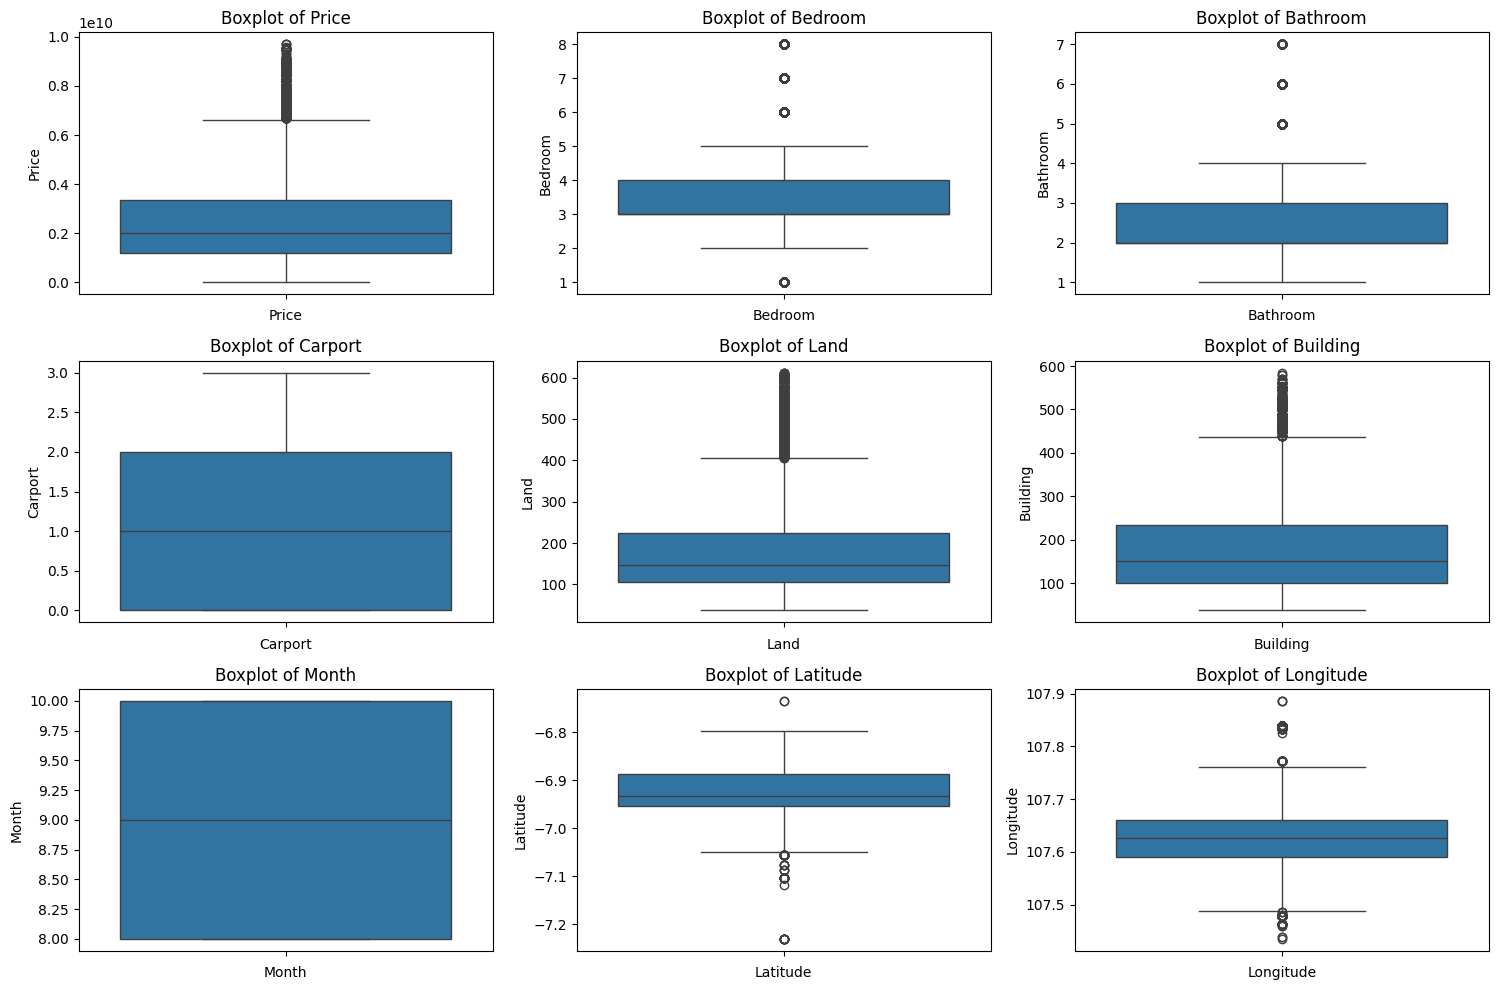

In [71]:

numeric_columns = ['Price', 'Bedroom', 'Bathroom', 'Carport', 'Land', 'Building', 'Month', 'Latitude', 'Longitude']

plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


In [72]:

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


numeric_columns = ['Price', 'Bedroom', 'Bathroom', 'Carport', 'Land', 'Building', 'Month', 'Latitude', 'Longitude']

for column in numeric_columns:
    df = remove_outliers_iqr(df, column)

print("Shape of DataFrame after removing outliers:", df.shape)

print("Final DataFrame after handling outliers:")
print(df)

Shape of DataFrame after removing outliers: (22337, 11)
Final DataFrame after handling outliers:
              Price         Location  Bedroom  Bathroom  Carport   Land  \
1      8.500000e+08       Parongpong        2       1.0      1.0   70.0   
2      8.750000e+08        Buah Batu        3       2.0      1.0   60.0   
3      1.750000e+09      Bojongsoang        2       3.0      1.0   90.0   
4      4.900000e+09  Bojongloa Kidul        4       4.0      0.0  200.0   
5      5.200000e+09         Gedebage        3       3.0      0.0  240.0   
...             ...              ...      ...       ...      ...    ...   
32521  2.500000e+09            Regol        4       3.0      1.0  140.0   
32525  1.200000e+09        Arcamanik        4       2.0      1.0  120.0   
32529  1.470000e+09         Sukasari        3       2.0      2.0  132.0   
32531  4.750000e+08        Rancasari        2       1.0      1.0   60.0   
32535  1.350000e+09        Buah Batu        3       2.0      1.0  101.0   

  

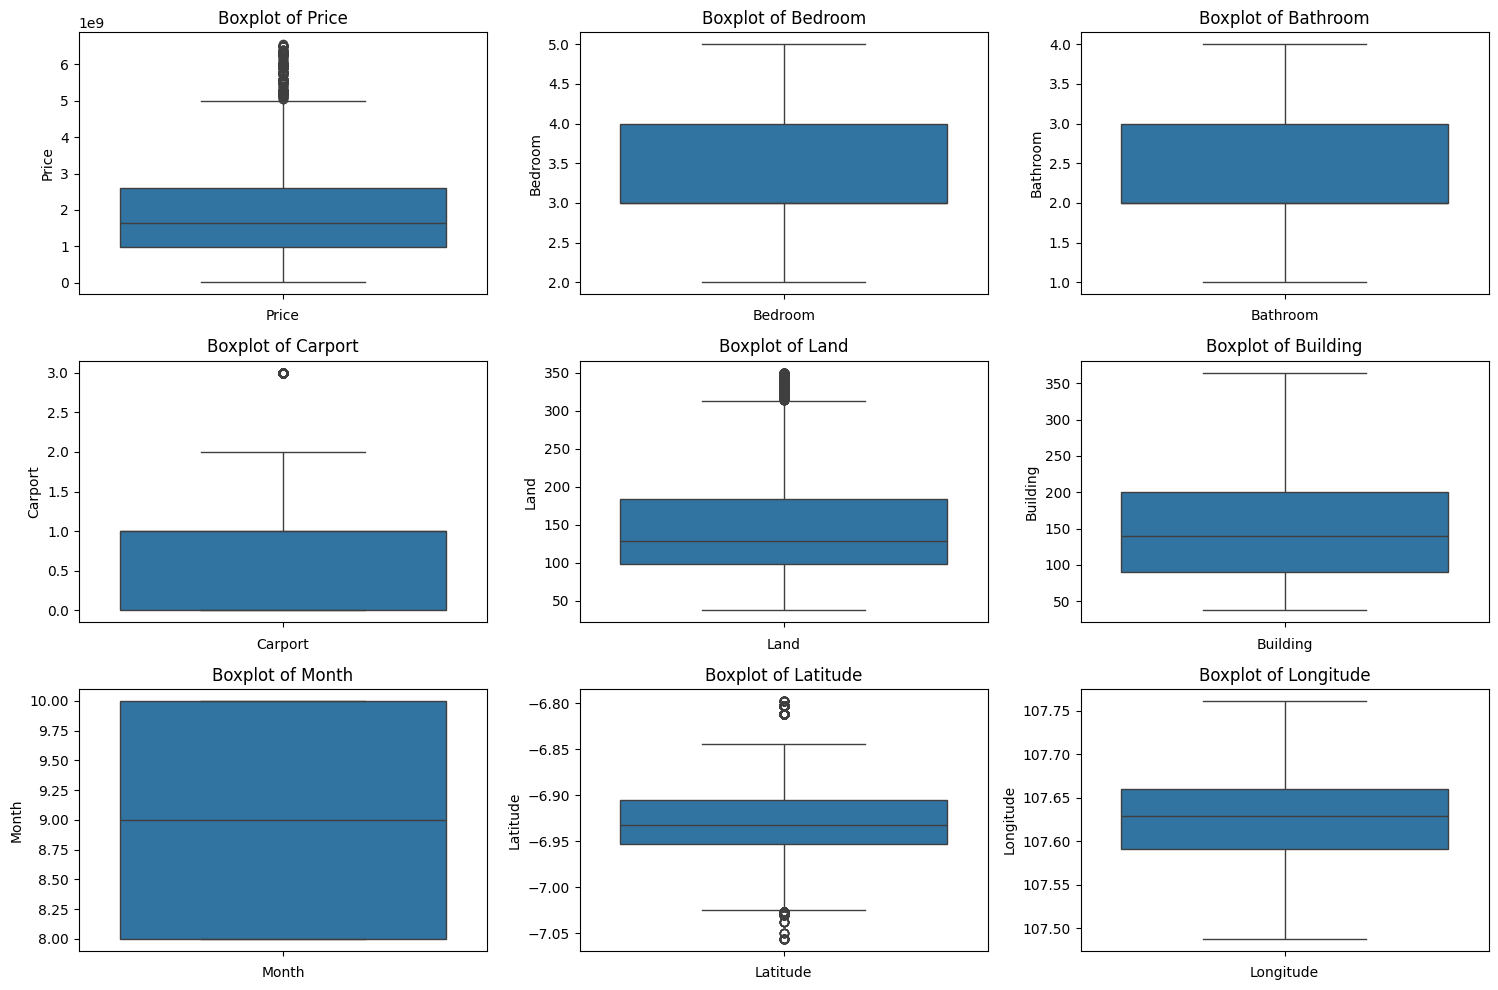

In [73]:

numeric_columns = ['Price', 'Bedroom', 'Bathroom', 'Carport', 'Land', 'Building', 'Month', 'Latitude', 'Longitude']

plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


**Visualization**

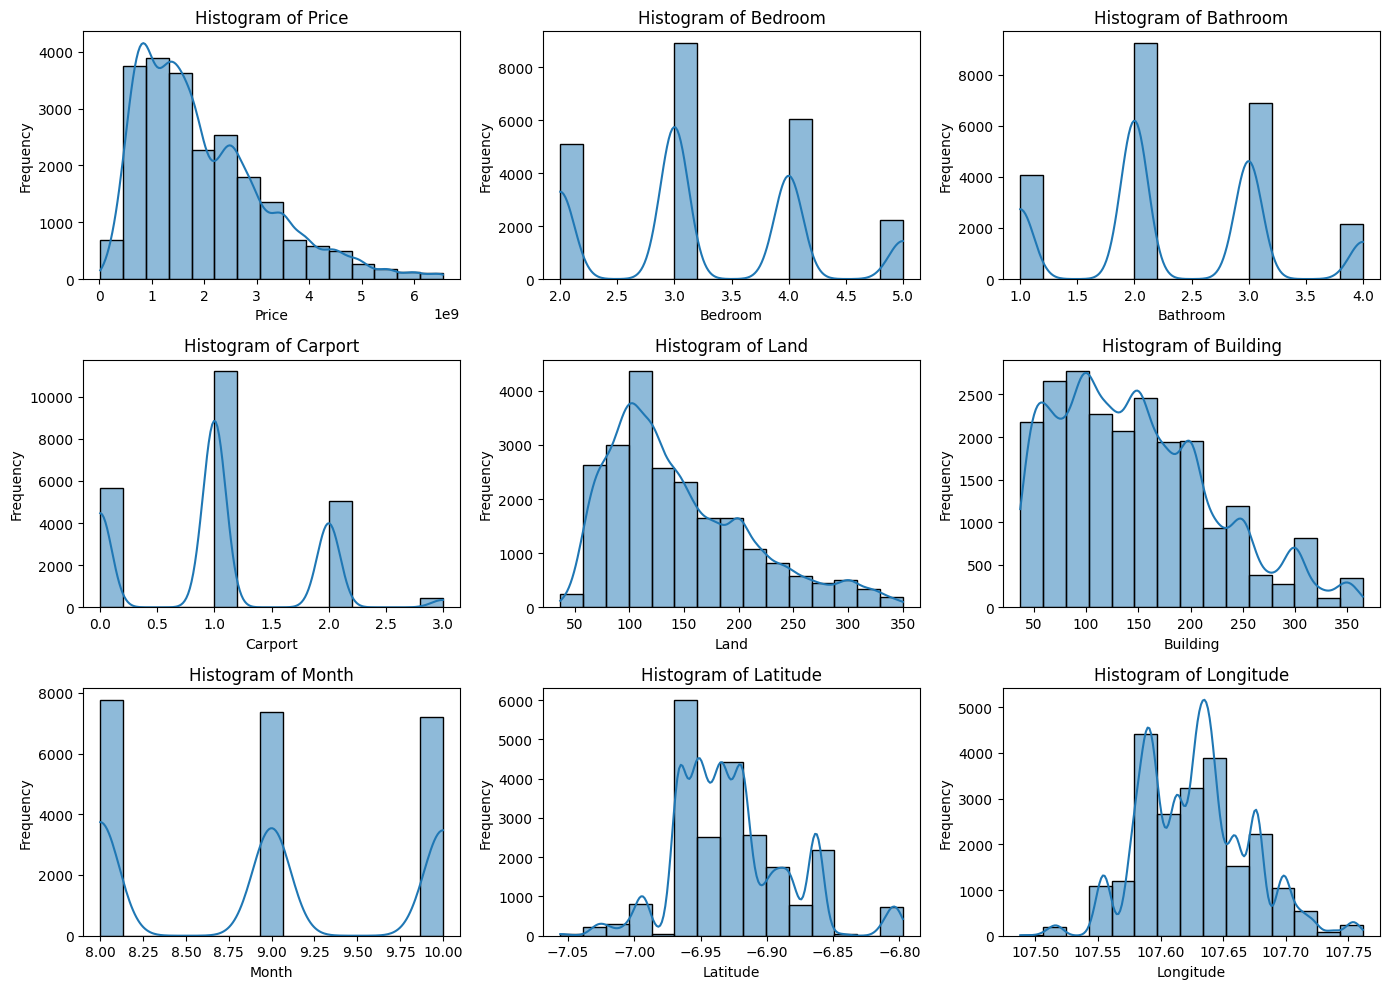

In [74]:
plt.figure(figsize=(14, 10))
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], bins=15, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

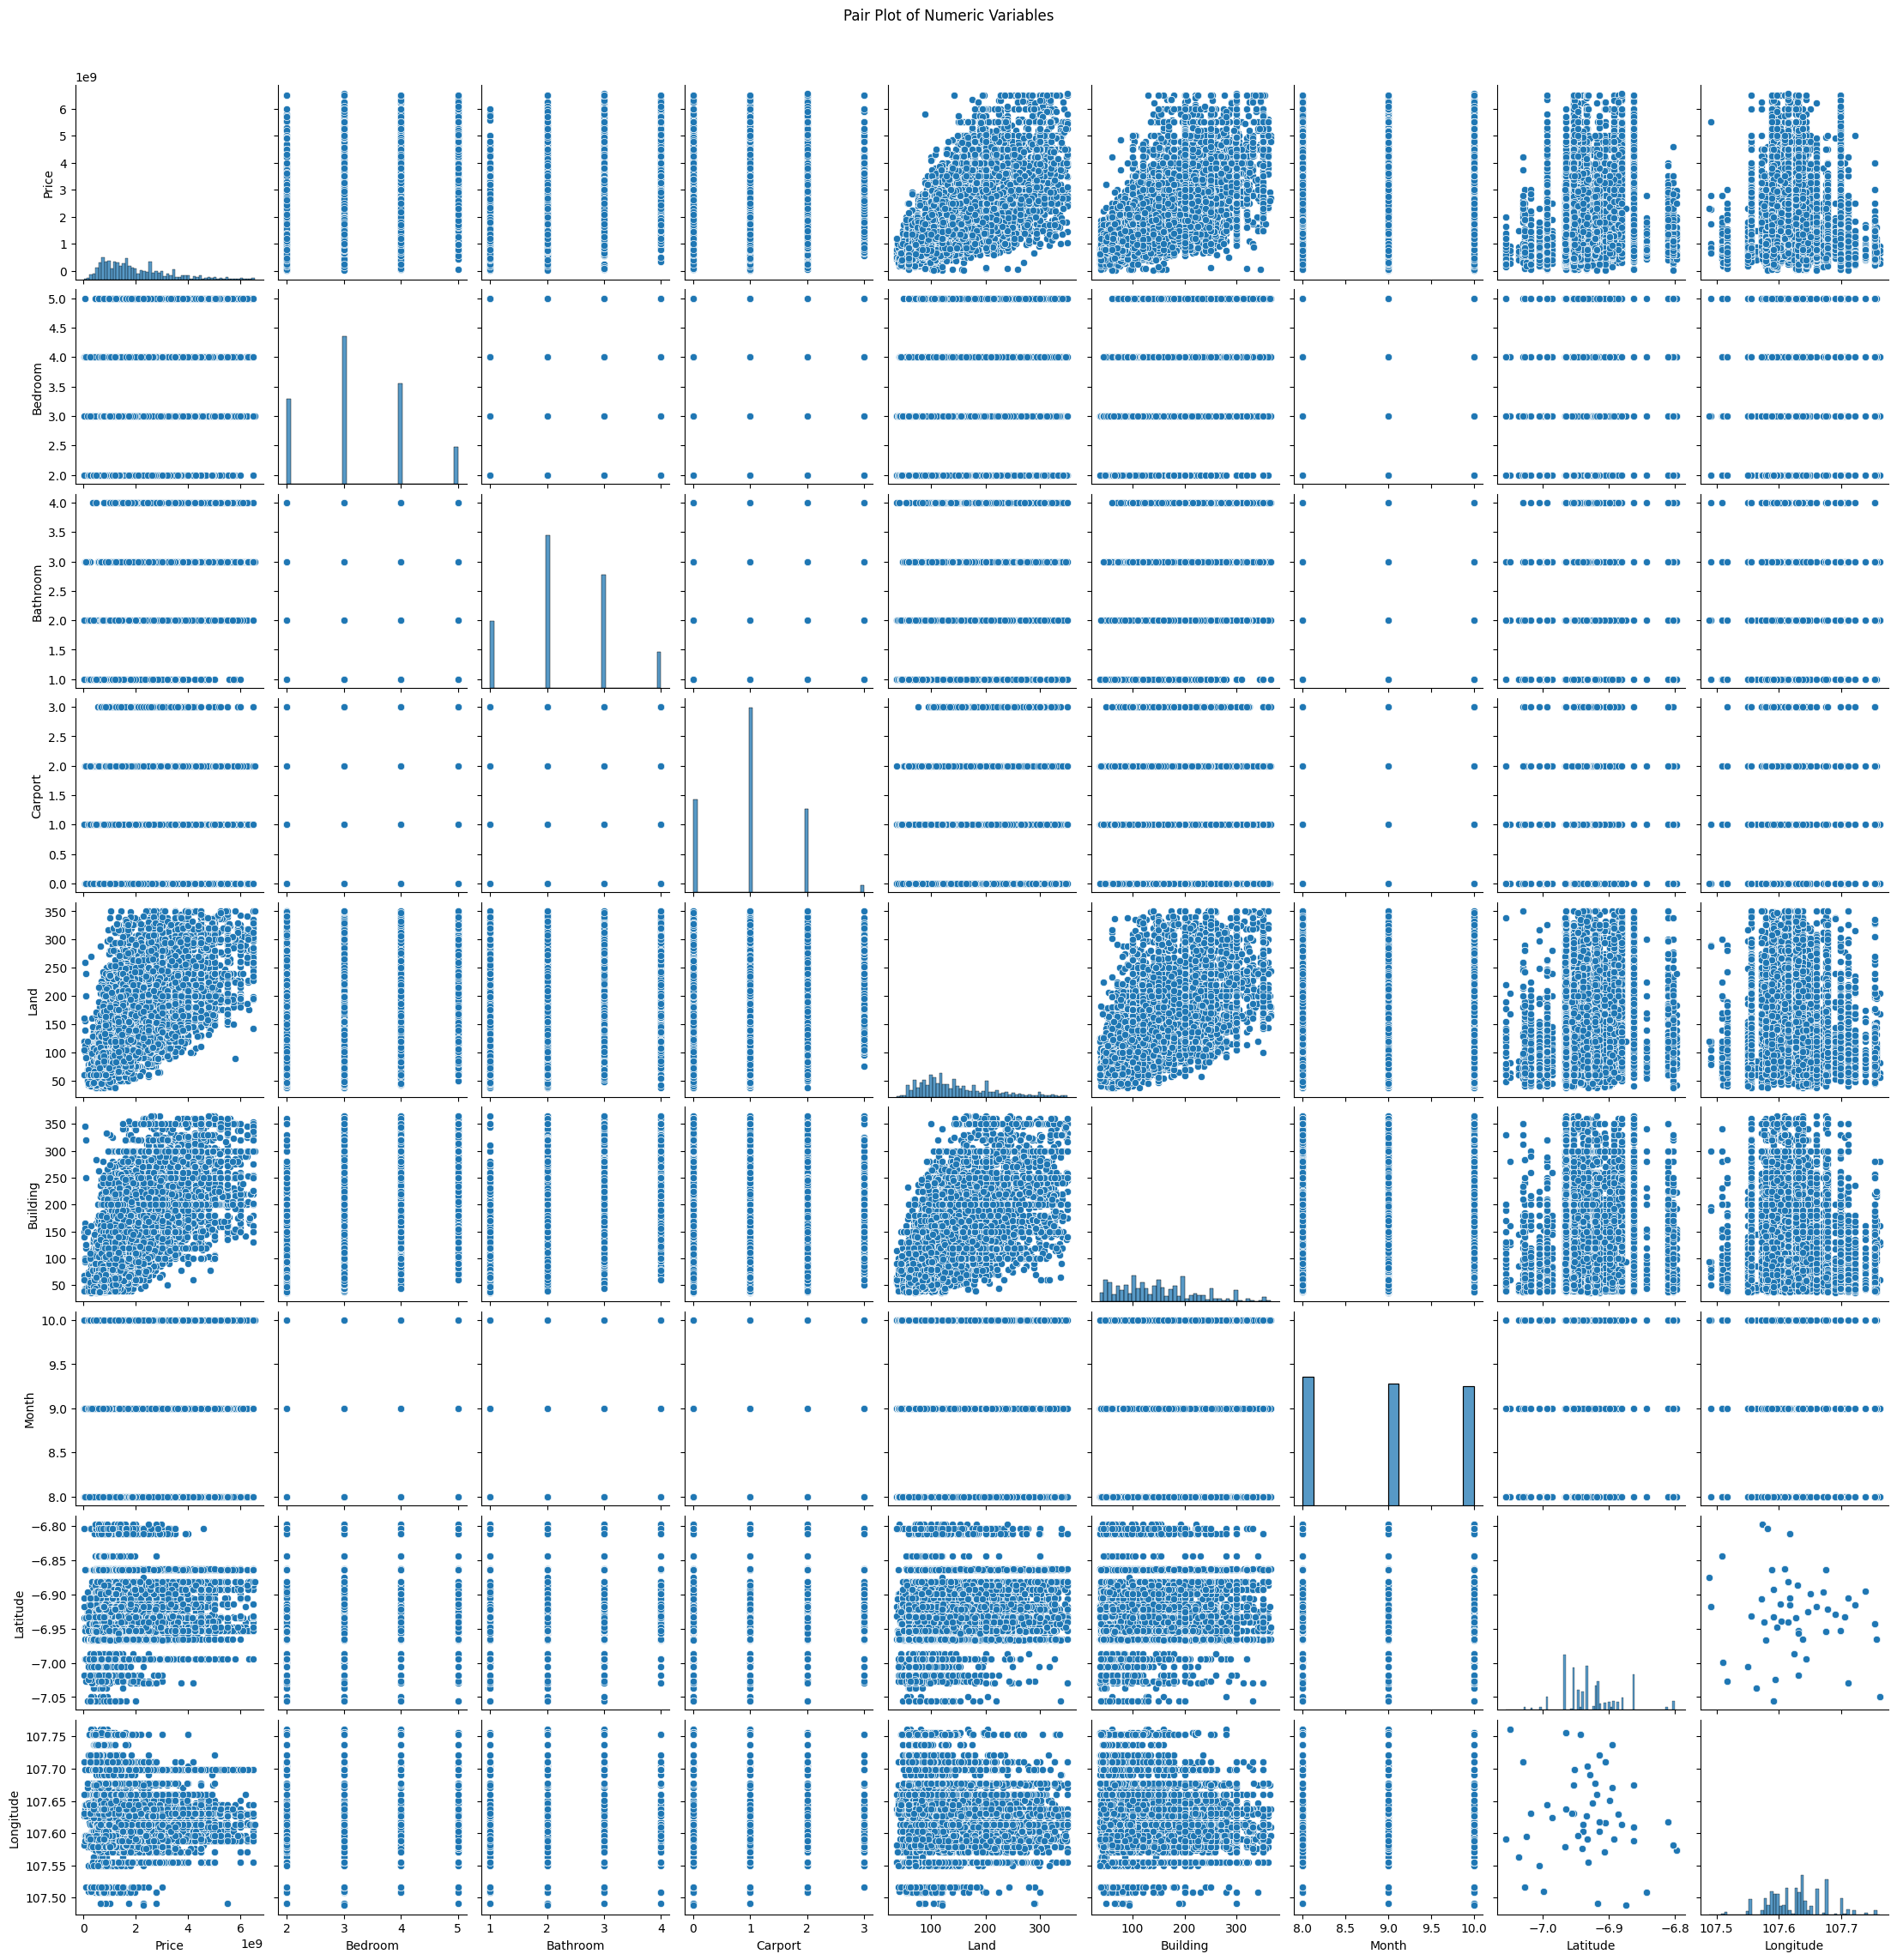

In [75]:
sns.pairplot(df.select_dtypes(include=['float64', 'int64']))
plt.suptitle('Pair Plot of Numeric Variables', y=1.02)
plt.show()

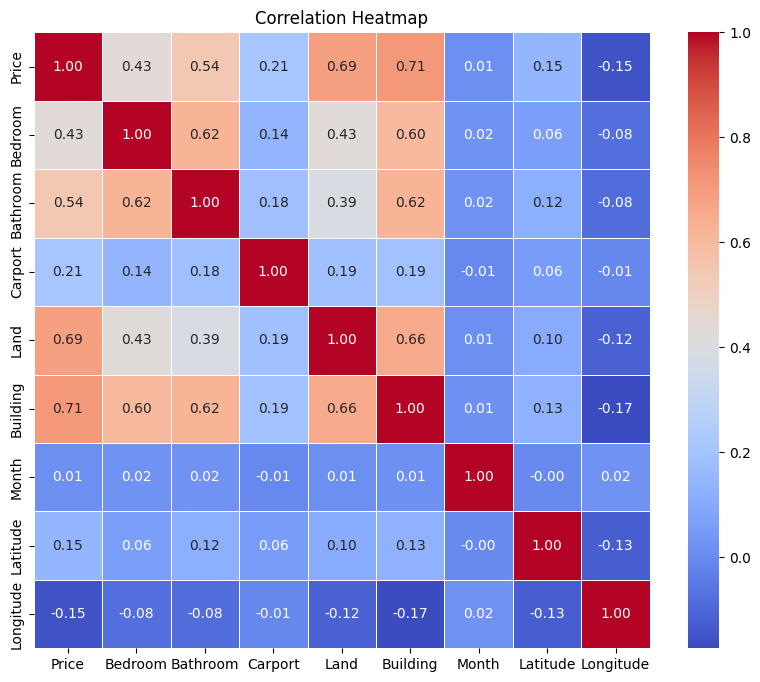

In [76]:
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

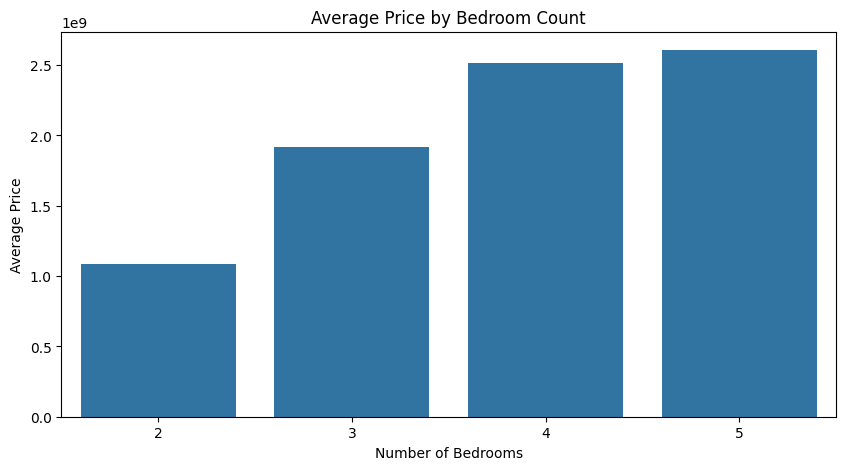

In [77]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Bedroom', y='Price', data=df, estimator=np.mean, errorbar=None)  # Updated line
plt.title('Average Price by Bedroom Count')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.show()


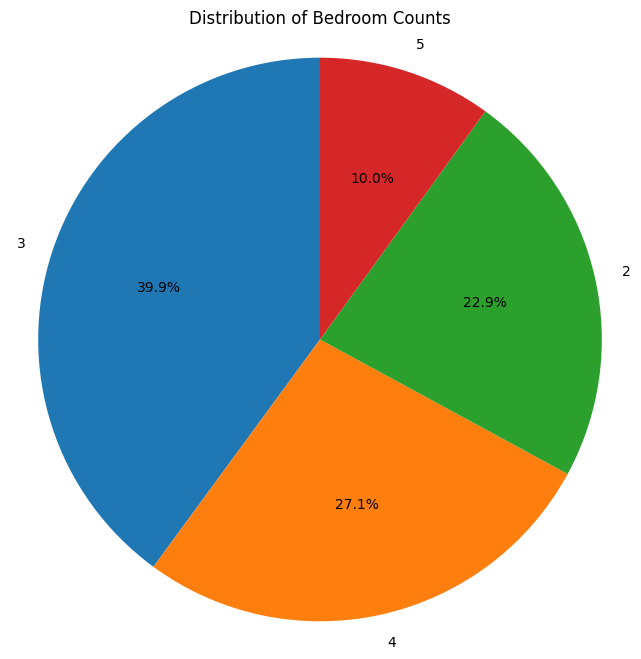

In [78]:
bedroom_counts = df['Bedroom'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(bedroom_counts, labels=bedroom_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Bedroom Counts')
plt.axis('equal')
plt.show()

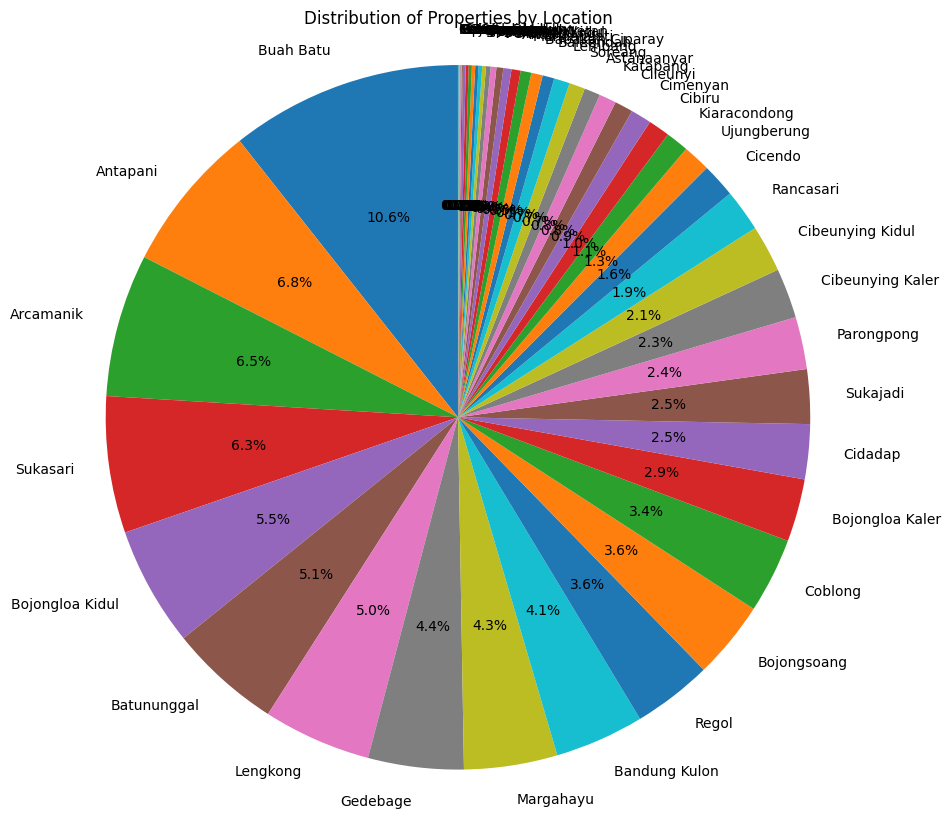

In [79]:
location_counts = df['Location'].value_counts()

plt.figure(figsize=(10, 10))
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Properties by Location')
plt.axis('equal')
plt.show()

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22337 entries, 1 to 32535
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         22337 non-null  float64
 1   Location      22337 non-null  object 
 2   Bedroom       22337 non-null  int64  
 3   Bathroom      22337 non-null  float64
 4   Carport       22337 non-null  float64
 5   Land          22337 non-null  float64
 6   Building      22337 non-null  float64
 7   Month         22337 non-null  float64
 8   City/Regency  22337 non-null  object 
 9   Latitude      22337 non-null  float64
 10  Longitude     22337 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 2.0+ MB


**Encoding**

In [81]:
from sklearn.preprocessing import LabelEncoder

In [82]:

le_location = LabelEncoder()
le_city = LabelEncoder()

df['Location'] = le_location.fit_transform(df['Location'])

df['City/Regency'] = le_city.fit_transform(df['City/Regency'])

print("DataFrame after Encoding:")
print(df)

DataFrame after Encoding:
              Price  Location  Bedroom  Bathroom  Carport   Land  Building  \
1      8.500000e+08        43        2       1.0      1.0   70.0      80.0   
2      8.750000e+08        15        3       2.0      1.0   60.0      70.0   
3      1.750000e+09        14        2       3.0      1.0   90.0      94.0   
4      4.900000e+09        13        4       4.0      0.0  200.0     300.0   
5      5.200000e+09        31        3       3.0      0.0  240.0     169.0   
...             ...       ...      ...       ...      ...    ...       ...   
32521  2.500000e+09        46        4       3.0      1.0  140.0     168.0   
32525  1.200000e+09         2        4       2.0      1.0  120.0     220.0   
32529  1.470000e+09        49        3       2.0      2.0  132.0      85.0   
32531  4.750000e+08        45        2       1.0      1.0   60.0      65.0   
32535  1.350000e+09        15        3       2.0      1.0  101.0     111.0   

       Month  City/Regency  Latitude 

**Scaling**

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:

numeric_columns = ['Price', 'Bedroom', 'Bathroom', 'Carport', 'Land', 'Building', 'Month', 'Latitude', 'Longitude']

scaler = StandardScaler()

df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

print("DataFrame after Scaling:")
print(df)

DataFrame after Scaling:
          Price  Location   Bedroom  Bathroom   Carport      Land  Building  \
1     -0.912307        43 -1.353541 -1.498235 -0.017788 -1.159018 -0.912141   
2     -0.891725        15 -0.263555 -0.362830 -0.017788 -1.311784 -1.047349   
3     -0.171350        14 -1.353541  0.772576 -0.017788 -0.853487 -0.722848   
4      2.421998        13  0.826432  1.907981 -1.355574  0.826937  2.062450   
5      2.668984        31 -0.263555  0.772576 -1.355574  1.438000  0.291216   
...         ...       ...       ...       ...       ...       ...       ...   
32521  0.446114        46  0.826432  0.772576 -0.017788 -0.089658  0.277696   
32525 -0.624157         2  0.826432 -0.362830 -0.017788 -0.395189  0.980781   
32529 -0.401870        49 -0.263555 -0.362830  1.319999 -0.211870 -0.844536   
32531 -1.221039        45 -1.353541 -1.498235 -0.017788 -1.311784 -1.114954   
32535 -0.500664        15 -0.263555 -0.362830 -0.017788 -0.685444 -0.492994   

          Month  City/Rege

# **ML Model & Model’s performance**

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [86]:
y = df['Price']
X = df.drop(columns=['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**1. Linear Regression model**

In [87]:

linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Evaluation")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Linear Regression Model Evaluation
Mean Absolute Error: 0.44373927938769436
Mean Squared Error: 0.361677820344086
R^2 Score: 0.6358704433736229


**2. Decision Tree Regressor**

In [88]:
decision_tree_model = DecisionTreeRegressor(random_state=42)

decision_tree_model.fit(X_train, y_train)

y_pred = decision_tree_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Decision Tree Regressor Model Evaluation")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Decision Tree Regressor Model Evaluation
Mean Absolute Error: 0.2597949064415605
Mean Squared Error: 0.25696957457371283
R^2 Score: 0.7412884838584357


**3. Random Forest Regressor**

In [89]:
random_forest_model = RandomForestRegressor(random_state=42)

random_forest_model.fit(X_train, y_train)

y_pred = random_forest_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regressor Model Evaluation")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Random Forest Regressor Model Evaluation
Mean Absolute Error: 0.22730972105679587
Mean Squared Error: 0.14189735963797726
R^2 Score: 0.8571407486301639


**4. K-Nearest Neighbors Regression (KNN)**

In [91]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

knn_model = KNeighborsRegressor(n_neighbors=5)

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("K-Nearest Neighbors Regressor Model Evaluation")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


K-Nearest Neighbors Regressor Model Evaluation
Mean Absolute Error: 0.36709125256439074
Mean Squared Error: 0.2859745059720231
R^2 Score: 0.7120869342583044


# **Conclusion - Report explaining the results and provide recommendations for both the real estate company and potential property buyers**


This report evaluates four regression models for predicting property prices: **Linear Regression**, **Decision Tree Regressor**, **Random Forest Regressor**, and **K-Nearest Neighbors Regressor (KNN)**. Performance metrics used include Mean Absolute Error (MAE), Mean Squared Error (MSE), and R² Score.

### Model Evaluations

1. **Linear Regression**
   - **MAE:** 0.4437
   - **MSE:** 0.3617
   - **R² Score:** 0.6359

2. **Decision Tree Regressor**
   - **MAE:** 0.2598
   - **MSE:** 0.2570
   - **R² Score:** 0.7413

3. **Random Forest Regressor**
   - **MAE:** 0.2273
   - **MSE:** 0.1419
   - **R² Score:** 0.8571

4. **K-Nearest Neighbors Regressor**
   - **MAE:** 0.3671
   - **MSE:** 0.2860
   - **R² Score:** 0.7121

### Recommendations

#### For the Real Estate Company:
- **Use Random Forest** for price predictions due to its superior performance.
- **Enhance Data Features** by including additional relevant metrics.
- **Regularly Update Models** with new data to maintain accuracy.
- **Implement Visualization Tools** to effectively communicate insights.

#### For Potential Property Buyers:
- **Leverage Random Forest Predictions** to make informed purchasing decisions.
- **Analyze Market Trends** revealed by the model to guide property searches.
- **Consider Additional Factors** beyond price predictions, such as neighborhood quality.

### Conclusion
The Random Forest Regressor is the most effective model for predicting property prices, providing valuable insights for both the real estate company and potential buyers.